# Data

In [1]:
from datasets import load_dataset
from datasets import Features
from datasets import Value
from datasets import ClassLabel

### Data Config

In [2]:
data_path = '/home/ubuntu/sentiment_analysis/data/conv_sent.csv'

### Load Data Features

In [3]:
features = Features({
    'text': Value(dtype = 'string', id = None),
    'label': ClassLabel(num_classes = 60, names_file = '/home/ubuntu/sentiment_analysis/data/emotion_lst.csv', id = None),
})

### Load Data

In [4]:
data = load_dataset('csv', data_files=data_path, features=features, split='train')
data

Found cached dataset csv (/home/ubuntu/.cache/huggingface/datasets/csv/default-8684678a6a5de86e/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d)


Dataset({
    features: ['text', 'label'],
    num_rows: 116536
})

### Split Train & Test

In [5]:
data = data.train_test_split(test_size=0.2)

In [6]:
data

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 93228
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 23308
    })
})

# Tokenizer

In [7]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

### Tokenizer Example

In [8]:
data['train'][0]['text']

'내가 사랑했던 친구들이 더는 나를 사랑하지 않는 것 같아. 이제 나의 삶의 의미는 어디서 찾을 수 있을까?'

In [9]:
tokens = tokenizer.tokenize(data['train'][0]['text'])
tokens

['내',
 '##가',
 '사랑',
 '##했',
 '##던',
 '친구',
 '##들이',
 '더',
 '##는',
 '나',
 '##를',
 '사랑',
 '##하',
 '##지',
 '않',
 '##는',
 '것',
 '같',
 '##아',
 '.',
 '이제',
 '나',
 '##의',
 '삶',
 '##의',
 '의미',
 '##는',
 '어디',
 '##서',
 '찾',
 '##을',
 '수',
 '있',
 '##을까',
 '?']

###  Encoder

In [10]:
def tokenize(batch):
    return tokenizer(batch['text'], padding = True, truncation = True)

### Encode Data

In [11]:
encoded_data = data.map(tokenize, batched = True, batch_size = 64)

Map:   0%|          | 0/93228 [00:00<?, ? examples/s]

Map:   0%|          | 0/23308 [00:00<?, ? examples/s]

In [12]:
encoded_data['train'].column_names

['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask']

# Model

### Model Config

In [14]:
import torch
model_path = "klue/bert-base"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [15]:
id2label = {
    "0": "분노",
    "1": "툴툴대는",
    "2": "좌절한",
    "3": "짜증내는",
    "4": "방어적인",
    "5": "악의적인",
    "6": "안달하는",
    "7": "구역질 나는",
    "8": "노여워하는",
    "9": "성가신",
    "10": "슬픔",
    "11": "실망한",
    "12": "비통한",
    "13": "후회되는",
    "14": "우울한",
    "15": "마비된",
    "16": "염세적인",
    "17": "눈물이 나는",
    "18": "낙담한",
    "19": "환멸을 느끼는",
    "20": "불안",
    "21": "두려운",
    "22": "스트레스 받는",
    "23": "취약한",
    "24": "혼란스러운",
    "25": "당혹스러운",
    "26": "회의적인",
    "27": "걱정스러운",
    "28": "조심스러운",
    "29": "초조한",
    "30": "상처",
    "31": "질투하는",
    "32": "배신당한",
    "33": "고립된",
    "34": "충격 받은",
    "35": "가난한 불우한",
    "36": "희생된",
    "37": "억울한",
    "38": "괴로워하는",
    "39": "버려진",
    "40": "당황",
    "41": "고립된(당황한)",
    "42": "남의 시선을 의식하는",
    "43": "외로운",
    "44": "열등감",
    "45": "죄책감의",
    "46": "부끄러운",
    "47": "혐오스러운",
    "48": "한심한",
    "49": "혼란스러운(당황한)",
    "50": "기쁨",
    "51": "감사하는",
    "52": "신뢰하는",
    "53": "편안한",
    "54": "만족스러운",
    "55": "흥분",
    "56": "느긋",
    "57": "안도",
    "58": "신이 난",
    "59": "자신하는"
  }

In [16]:
label2id =  {
    "분노": 0,
    "툴툴대는": 1,
    "좌절한": 2,
    "짜증내는": 3,
    "방어적인": 4,
    "악의적인": 5,
    "안달하는": 6,
    "구역질 나는": 7,
    "노여워하는": 8,
    "성가신": 9,
    "슬픔": 10,
    "실망한": 11,
    "비통한": 12,
    "후회되는": 13,
    "우울한": 14,
    "마비된": 15,
    "염세적인": 16,
    "눈물이 나는": 17,
    "낙담한": 18,
    "환멸을 느끼는": 19,
    "불안": 20,
    "두려운": 21,
    "스트레스 받는": 22,
    "취약한": 23,
    "혼란스러운": 24,
    "당혹스러운": 25,
    "회의적인": 26,
    "걱정스러운": 27,
    "조심스러운": 28,
    "초조한": 29,
    "상처": 30,
    "질투하는": 31,
    "배신당한": 32,
    "고립된": 33,
    "충격 받은": 34,
    "가난한 불우한": 35,
    "희생된": 36,
    "억울한": 37,
    "괴로워하는": 38,
    "버려진": 39,
    "당황": 40,
    "고립된(당황한)": 41,
    "남의 시선을 의식하는": 42,
    "외로운": 43,
    "열등감": 44,
    "죄책감의": 45,
    "부끄러운": 46,
    "혐오스러운": 47,
    "한심한": 48,
    "혼란스러운(당황한)": 49,
    "기쁨": 50,
    "감사하는": 51,
    "신뢰하는": 52,
    "편안한": 53,
    "만족스러운": 54,
    "흥분": 55,
    "느긋": 56,
    "안도": 57,
    "신이 난": 58,
    "자신하는": 59
}

### Load Model

In [17]:
from transformers import AutoModelForSequenceClassification

num_labels = len(data['train'].features['label'].names)
model = AutoModelForSequenceClassification.from_pretrained(
    model_path,
    num_labels=num_labels,
    id2label= id2label,
    label2id = label2id
).to(device)

2023-08-09 04:38:26.996301: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-09 04:38:27.048783: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-09 04:38:27.932310: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at klue/bert-base and are newly initial

# Evaluate

In [18]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1}
    

# Training

### Training Config

In [20]:
from transformers import AdamW, get_linear_schedule_with_warmup
optimizer= AdamW(model.parameters(), 
                 lr=2e-5, 
                 eps=1e-8)


/opt/conda/envs/pytorch/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [24]:
from transformers import Trainer, TrainingArguments
from transformers import get_linear_schedule_with_warmup

batch_size = 32
epoch = 5
num_steps = (len(data['train']) // batch_size) * epoch
warmup_steps = num_steps * 0.1
print(num_steps)

training_args = TrainingArguments(
    output_dir="/home/ubuntu/klue-bert-base-sentiment/ckpt",
    logging_dir="/home/ubuntu/klue-bert-base-sentiment/log",
    evaluation_strategy="steps",
    overwrite_output_dir=True,

    num_train_epochs=epoch,

    auto_find_batch_size=True,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,

    weight_decay=0.01,
    learning_rate=2e-5,
    warmup_ratio = 0.1,

    load_best_model_at_end=True,
    save_total_limit=5,

    logging_steps=2000,
    save_steps=2000,

    run_name="klue_bert_base_sentiment",
    report_to="wandb",
    disable_tqdm=False,
    log_level='error',
)

14565


### Train

In [26]:
trainer = Trainer(
    model=model,
    args = training_args,
    compute_metrics=compute_metrics,
    train_dataset=encoded_data['train'],
    eval_dataset=encoded_data['test'],
    tokenizer=tokenizer,
)

In [27]:
trainer.train()

/opt/conda/envs/pytorch/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: gnsrnjs. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,Accuracy,F1
2000,3.590600,3.097124,0.248885,0.242876
4000,2.989800,2.947776,0.275914,0.275665
6000,2.845900,2.887588,0.286597,0.282609
8000,2.629600,2.866825,0.293719,0.291020
10000,2.479100,2.873578,0.295735,0.293242
12000,2.375400,2.876316,0.299640,0.298193
14000,2.253600,2.877186,0.300970,0.299419


TrainOutput(global_step=14570, training_loss=2.718351683816275, metrics={'train_runtime': 4763.0478, 'train_samples_per_second': 97.866, 'train_steps_per_second': 3.059, 'total_flos': 1.4114043361399392e+16, 'train_loss': 2.718351683816275, 'epoch': 5.0})

# Eval

In [28]:
preds_output = trainer.predict(encoded_data['test'])
preds_output.metrics

{'test_loss': 2.8668248653411865,
 'test_accuracy': 0.29371889480006863,
 'test_f1': 0.29102037288558685,
 'test_runtime': 50.8082,
 'test_samples_per_second': 458.745,
 'test_steps_per_second': 14.348}

In [37]:
import json
with open("/home/ubuntu/klue-bert-base-sentiment/result/eval_result.json", "w") as json_file:
    json.dump(preds_output.metrics, json_file)

In [32]:
encoded_data.set_format('torch', columns = ['input_ids','attention_mask','label'])

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import rc


def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize='true')
    fig, ax = plt.subplots(figsize=(60,60))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format=".2f", ax=ax, colorbar=False)
    plt.title('normalized confusion matrix')
    plt.rc('font', family='NanumGothic')
    plt.show()

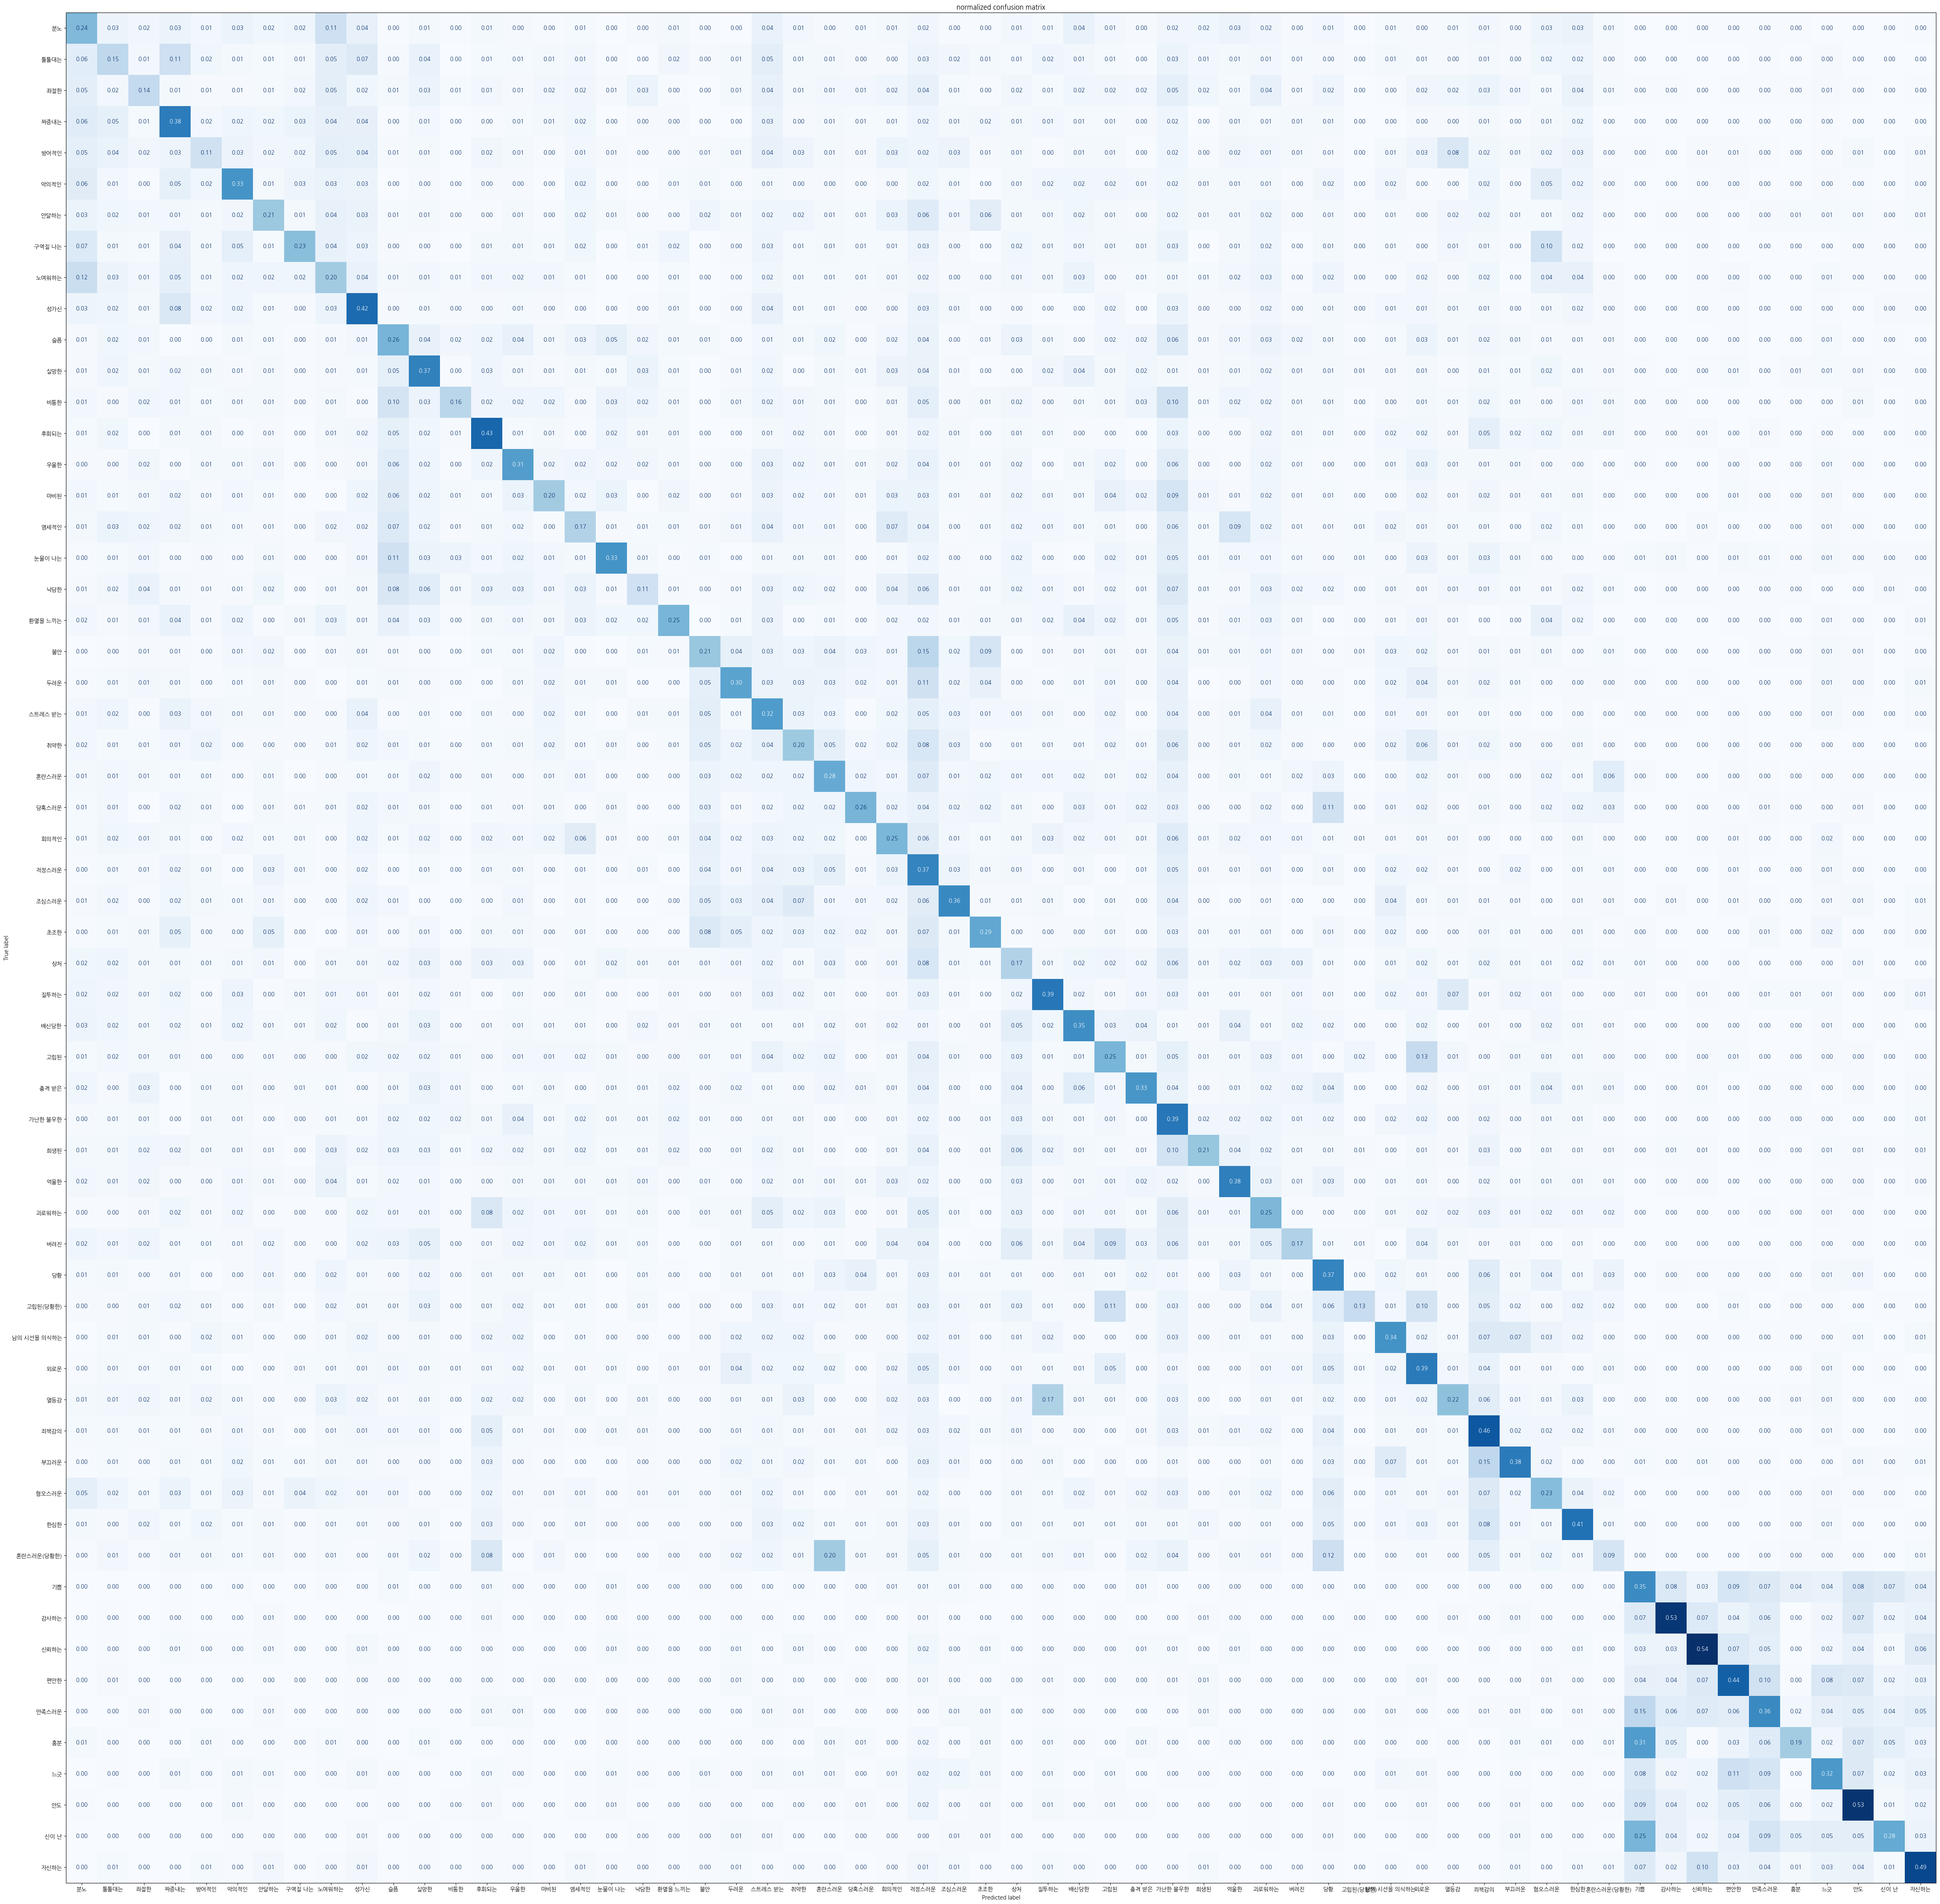

In [36]:
import numpy as np

y_preds = np.argmax(preds_output.predictions, axis=1)
y_valid = np.array(encoded_data['test']['label'])
labels = data['train'].features['label'].names
plot_confusion_matrix(y_preds, y_valid, labels)